##### Why is gradient descent important in machine learning?

Most models of machine learning need to find a area or a point to make sum of residuals reduced to a minimum value that models could fit data in a efficient way and show great performance. Gradient descent is one of a powerful algorithm to find the piont and sum of residuals reach to the minimum. 

##### How does plain vanilla gradient descent work? 

The cost function calculates the sum of residuals, the coefficients of will be updated with the changing sum of residuals. While the algorithm runs many times, the coefficients would be convergence in a stable value or area. This combine of coefficients is the target of status that the model fits data efficiently and we could use this model to prediction.

##### Example

In [1]:
# Import required libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.get_backend()
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import animation

In [2]:
# Create data
X_1 = np.random.randn(100)
X_2 = np.random.randn(100)
y = 20*X_1 + 5*X_2 + 2
X = np.vstack((X_1, X_2)).T

<IPython.core.display.Javascript object>


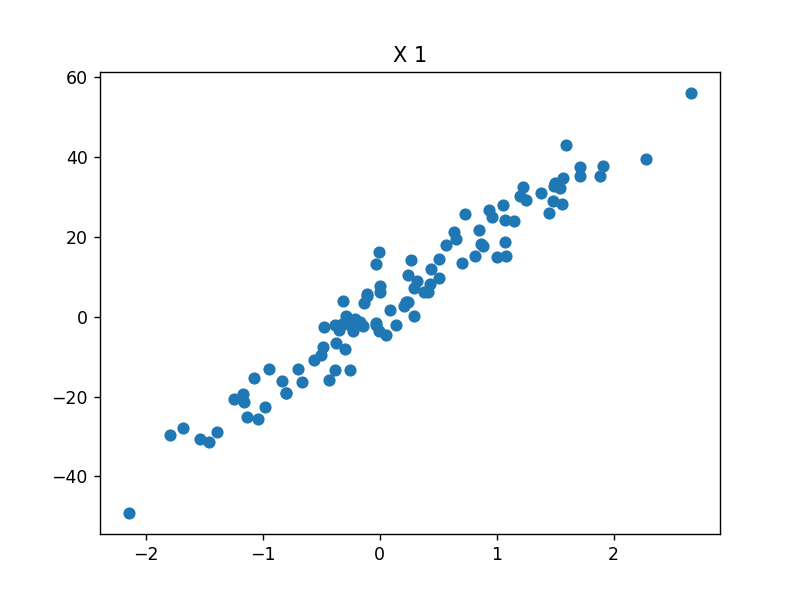

Text(0.5, 1.0, 'X 1')

In [12]:
# Visualization of variables one
plt.scatter(X_1, y)
plt.title('X 1')

<IPython.core.display.Javascript object>


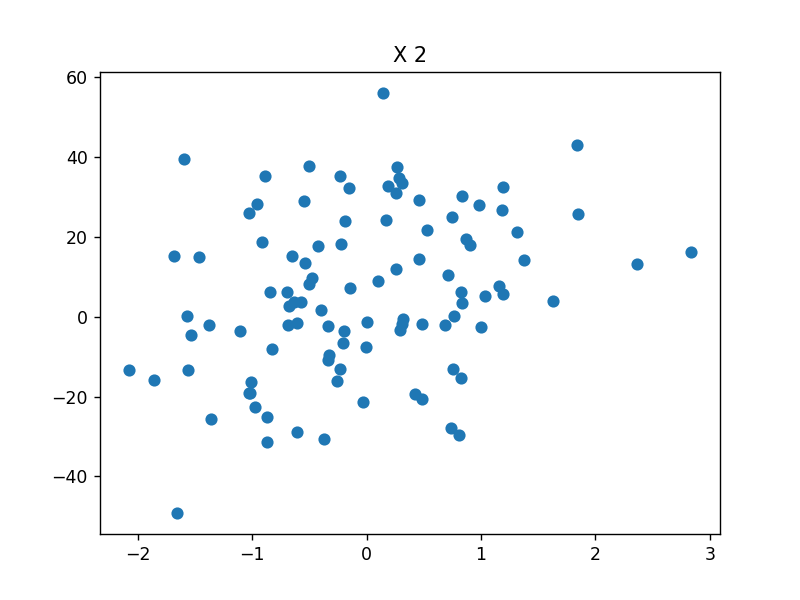

Text(0.5, 1.0, 'X 2')

In [13]:
# Visualization of variables two
plt.scatter(X_2, y)
plt.title('X 2')

##### Learning rate = 0.05

In [135]:
# Gradient descent
# Learning rate
learning_rate = 0.05

# The times of loop
T = 200

# Initial coefficients
theta_1 = np.zeros(T+1)
theta_2 = np.zeros(T+1)
theta = np.array([theta_1, theta_2])
# theta = np.array([0,0])

# Cost Function
def Cost_Func(X, y, theta):
    y_hat = X.dot(theta)
    cost = np.power((y - y_hat),2)
    value = np.sum(cost)/(2 * len(X))
    return value

In [136]:
# When the coefficients are 0, the initial value of sum of square
print('Sum of Square (initial): ', Cost_Func(X, y, theta[:,0]))

Sum of Square (initial):  221.1386293176772


In [137]:
# Gradient Function
def Grad(X, y, theta, T, learning_rate):
    for i in range(0,T):
        theta[:,i+1] = theta[:,i] - 1/len(X) * learning_rate * np.sum((X.dot(theta[:,i]) - y) * X.T, axis=1)
    return theta

In [138]:
# The target coefficients
print('Coefficients (updated): ', Grad(X, y, theta, T, learning_rate)[:, T])

Coefficients (updated):  [20.41351012  4.87481247]


In [139]:
# When we find the target coefficients, then, the value of sum of square is smaller significantly
print('Sum of Square (updated): ', Cost_Func(X, y, Grad(X, y, theta, T, learning_rate)[:, T]))

Sum of Square (updated):  1.9109790263293172


In [140]:
# Calculate all of sum of square value
mycostvalue = np.zeros(T+1)
for i in range(0,T):
    mycostvalue[i] = Cost_Func(X, y, Grad(X, y, theta, T, learning_rate)[:, i])

Comparing updated Sum of Square with initial value, there has a significant decrease. The result shows the minimum point was found by gradient descent algorithm.

<IPython.core.display.Javascript object>


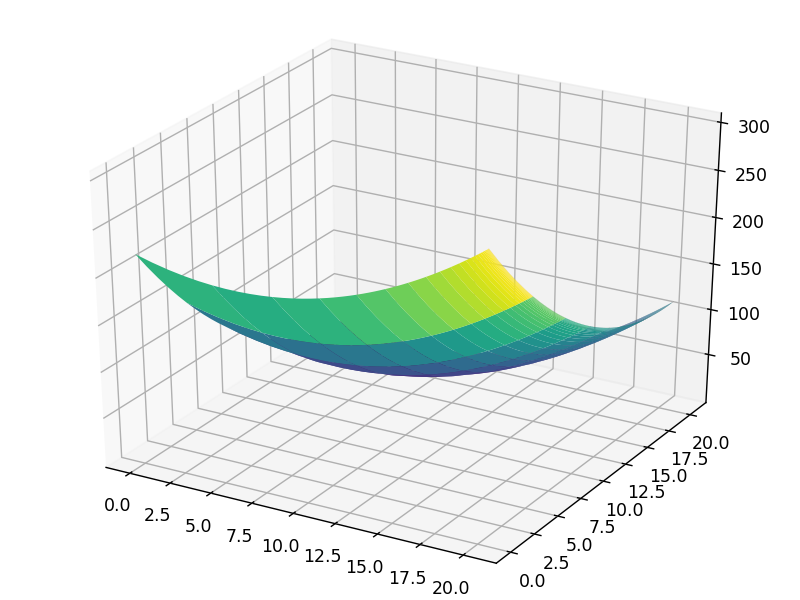

In [141]:
# The 3D figure of finding the global minimum
fig = plt.figure() 
axes3d = Axes3D(fig) 

# The x and y axis are theta 1 and theta 2
theta_s1 = Grad(X, y, theta, T, learning_rate)[0,:]
theta_s2 = Grad(X, y, theta, T, learning_rate)[0,:]
xs = theta_s1
ys = theta_s2
xs,ys = np.meshgrid(xs,ys)

# Calculate the sum of squre
zs = np.zeros([len(xs), len(ys)])
for j in range(0, len(xs)):
    for k in range(0, len(xs)):
        y_hat = X.dot(np.array([xs[k,j], ys[k,j]]))
        cost = np.power((y - y_hat),2)
        value = np.sum(cost)/(2 * len(X))
        zs[j, k] = value

# Create 3D figure
axes3d.plot_surface(xs,ys,zs, cmap='viridis')

From the 3D figure, it is clear that the location where the color is darkest, we could find the best coefficients and the sum of square is the smallest value.

<IPython.core.display.Javascript object>


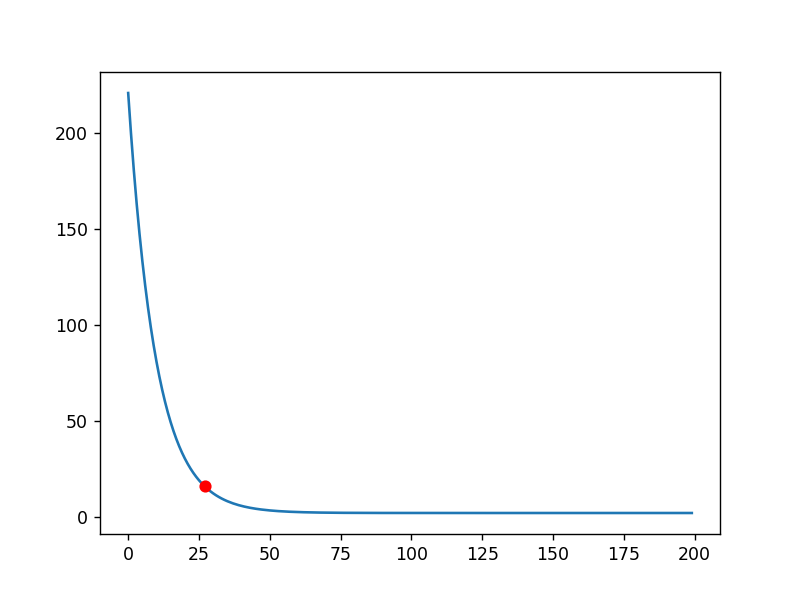

MovieWriter imagemagick unavailable. Trying to use pillow instead.


In [142]:
# The animation figure of how to gradient descent
fig, ax = plt.subplots()
x_ = np.linspace(0, T, T+1)
y_ = mycostvalue
l = ax.plot(x_[0:T], y_[0:T])
dot, = ax.plot([], [], 'ro')

def gen_dot():
    for i in range(0, T+1):
        newdot = [i, mycostvalue[i]]
        yield newdot
        
def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, interval = 100)
ani.save('dot.gif', writer='imagemagick', fps=30)

##### Learning rate = 0.005

In [205]:
# Gradient descent
# Learning rate
learning_rate =  0.005

# The times of loop
T = 2000

# Initial coefficients
theta_1 = np.zeros(T+1)
theta_2 = np.zeros(T+1)
theta = np.array([theta_1, theta_2])
# theta = np.array([0,0])

# Cost Function
def Cost_Func(X, y, theta):
    y_hat = X.dot(theta)
    cost = np.power((y - y_hat),2)
    value = np.sum(cost)/(2 * len(X))
    return value

In [206]:
# When the coefficients are 0, the initial value of sum of square
print('Sum of Square (initial): ', Cost_Func(X, y, theta[:,0]))

Sum of Square (initial):  221.1386293176772


In [207]:
# Gradient Function
def Grad(X, y, theta, T, learning_rate):
    for i in range(0,T):
        theta[:,i+1] = theta[:,i] - 1/len(X) * learning_rate * np.sum((X.dot(theta[:,i]) - y) * X.T, axis=1)
    return theta

In [208]:
# The target coefficients
print('Coefficients (updated): ', Grad(X, y, theta, T, learning_rate)[:, T])

Coefficients (updated):  [20.41329436  4.87482563]


In [210]:
# When we find the target coefficients, then, the value of sum of square is smaller significantly
print('Sum of Square (updated): ', Cost_Func(X, y, Grad(X, y, theta, T, learning_rate)[:, T]))

Sum of Square (updated):  1.9109792334482472


In [188]:
# Calculate all of sum of square value
mycostvalue = np.zeros(T+1)
for i in range(0,T):
    mycostvalue[i] = Cost_Func(X, y, Grad(X, y, theta, T, learning_rate)[:, i])

<IPython.core.display.Javascript object>


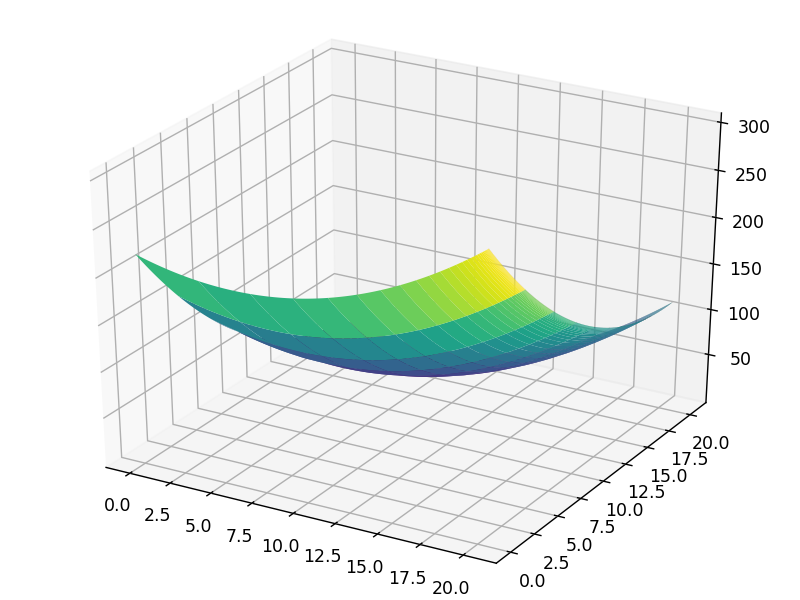

In [189]:
# The 3D figure of finding the global minimum
fig = plt.figure() 
axes3d = Axes3D(fig) 

# The x and y axis are theta 1 and theta 2
theta_s1 = Grad(X, y, theta, T, learning_rate)[0,:]
theta_s2 = Grad(X, y, theta, T, learning_rate)[0,:]
xs = theta_s1
ys = theta_s2
xs,ys = np.meshgrid(xs,ys)

# Calculate the sum of squre
zs = np.zeros([len(xs), len(ys)])
for j in range(0, len(xs)):
    for k in range(0, len(xs)):
        y_hat = X.dot(np.array([xs[k,j], ys[k,j]]))
        cost = np.power((y - y_hat),2)
        value = np.sum(cost)/(2 * len(X))
        zs[j, k] = value

# Create 3D figure
axes3d.plot_surface(xs,ys,zs, cmap='viridis')

<IPython.core.display.Javascript object>


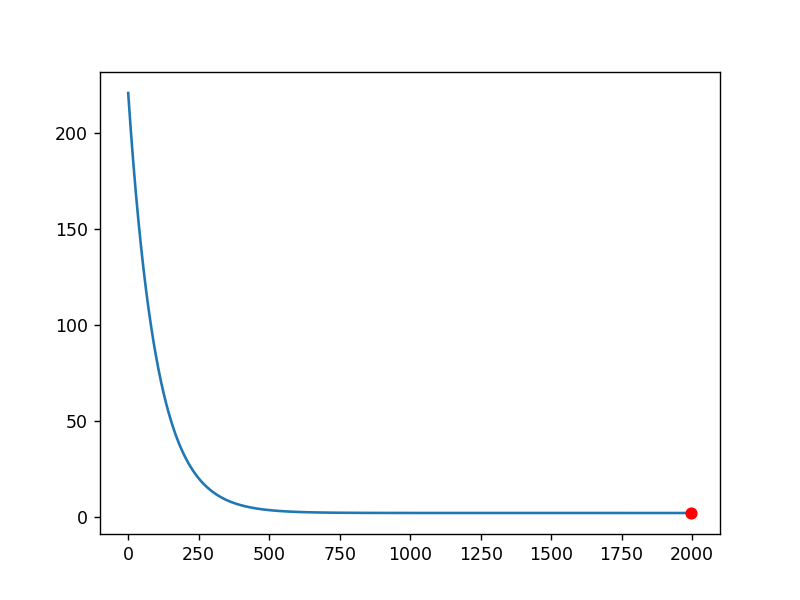

MovieWriter imagemagick unavailable. Trying to use pillow instead.


In [190]:
# The animation figure of how to gradient descent
fig, ax = plt.subplots()
x_ = np.linspace(0, T, T+1)
y_ = mycostvalue
l = ax.plot(x_[0:T], y_[0:T])
dot, = ax.plot([], [], 'ro')

def gen_dot():
    for i in range(0, T+1):
        newdot = [i, mycostvalue[i]]
        yield newdot
        
def update_dot(newd):
    dot.set_data(newd[0], newd[1])
    return dot,

ani = animation.FuncAnimation(fig, update_dot, frames = gen_dot, interval = 100)
ani.save('dot.gif', writer='imagemagick', fps=30)

Comparing learning rate = 0.05 and learning rate = 0.005, these have different ways to reach the point that makes sum of square to be smallest. While the learning rate is 0.05, we could know that the times of loop is smaller than learning rate is 0.005. And the sum of square is different, the learning rate = 0.05 would be better.

##### Stochastic gradient descent

In [240]:
# Stochastic gradient descent
# Learning rate
learning_rate =  0.05

# The times of loop
T = 100

# Initial coefficients
theta = np.array([0, 0])
epsilon = 0.0001


# Cost Function
def Cost_Func(X, y, theta):
    y_hat = X.dot(theta)
    cost = np.power((y - y_hat),2)
    value = np.sum(cost)/(2 * len(X))
    return value

In [241]:
# When the coefficients are 0, the initial value of sum of square
print('Sum of Square (initial): ', Cost_Func(X, y, theta))

Sum of Square (initial):  221.1386293176772


In [242]:
# Stochastic gradient descent Function
def stochastic_grad(X, y, theta, T, learning_rate):
    error = 0
    count = 0
    while count <= T:
        count += 0
        for j in range(0, len(X)):
            theta = theta - learning_rate * (X[j, :].dot(theta) - y[j]) * X[j, :].T
        
        if np.linalg.norm(theta - error) < epsilon: 
            break
        else:
            error = theta
    return theta

In [243]:
# The target coefficients
print('Coefficients (updated): ', stochastic_grad(X, y, theta, T, learning_rate))

Coefficients (updated):  [19.75677893  4.52927311]


In [246]:
# Updated Sum of Square
print('Sum of Square (initial): ', Cost_Func(X, y, stochastic_grad(X, y, theta, T, learning_rate)))

Sum of Square (initial):  2.1874873435119313
